In [11]:
import requests
from bs4 import BeautifulSoup

- requests 와 BeautifulSoup 모듈을 가져온다

In [12]:
URL = "https://lolchess.gg/"

- 사용하고 싶은 주소를 가져온다
- 예제로 사용할 주소는 알바천국 주소이다

In [13]:
get_URL = requests.get(URL)
print(get_URL, type(get_URL))

<Response [200]> <class 'requests.models.Response'>


In [14]:
soup = BeautifulSoup(get_URL.text, "html.parser")
print(str(soup)[:100])
print(type(soup))

<!DOCTYPE html>

<html data-locale="en-US" lang="en">
<head>
<title>TFT Stats, Leaderboards, League 
<class 'bs4.BeautifulSoup'>


- requests 로 주소를 사용가능하게 받아온다
- bs4 로 url을 텍스트로 받아온다.
<br>(자료형은 ```<class 'bs4.BeautifulSoup'>```이고, 굉장히 내용이 많기 때문에 str로 100자까지만 확인해 보았다)

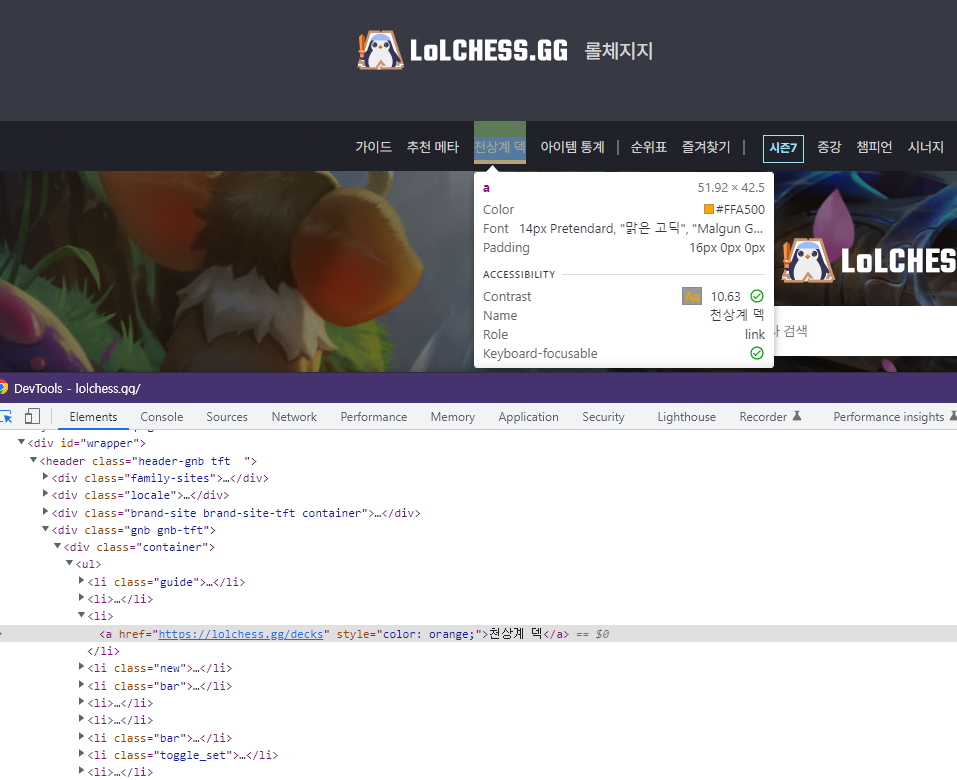

- 이미지를 보면 개발자 도구(F12)로 원하는 부분이 html에서 어디에 위치하고 있는지 확인할 수 있다.
- 마우스를 올려둔 ```"천상계 덱"```의 하이퍼링크를 텍스트로 추출해보도록 하자

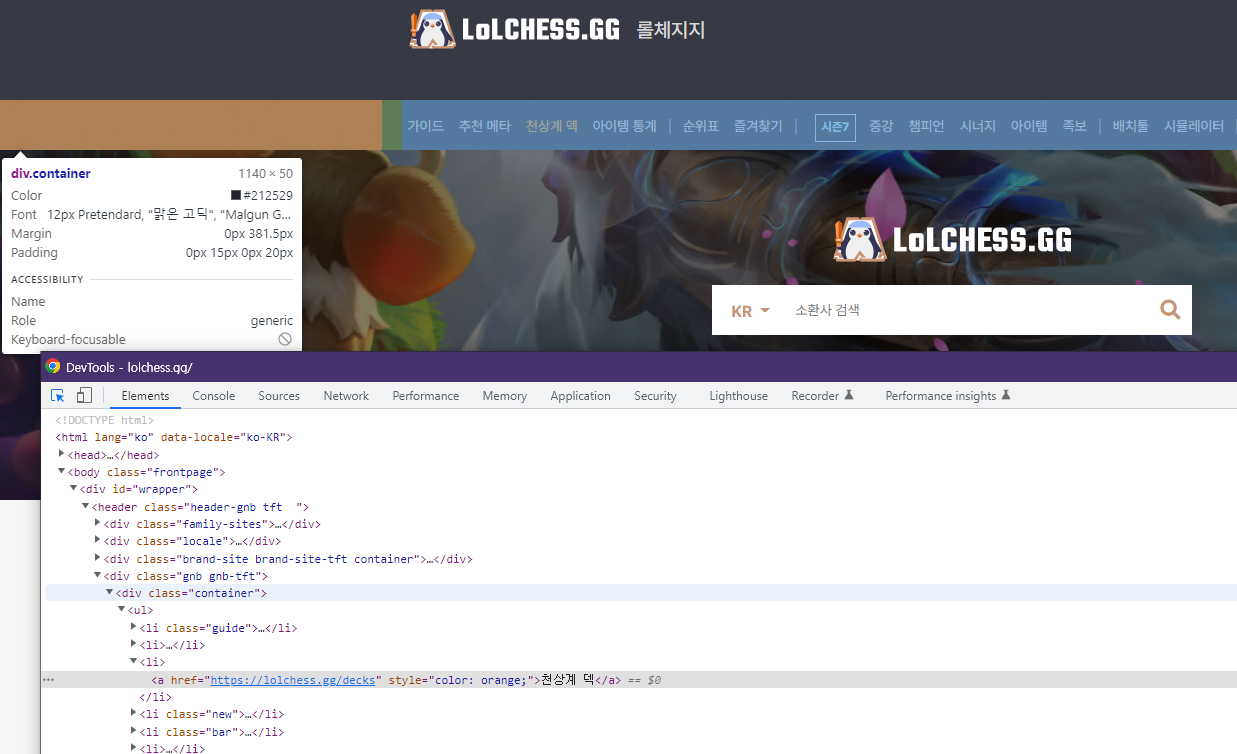

In [18]:
container = soup.find_all("div", {"class":"container"})
print(container)

[<div class="container">
<ul>
<li>
<a href="//dak.gg/pubg" rel="noopener noreferrer" target="_blank">
<img src="//cdn.lolchess.gg/images/family/ico_pubg.png" srcset="//cdn.lolchess.gg/images/family/ico_pubg@2x.png 2x"/>
<span>PUBG</span>
</a>
</li>
<li>
<a href="//dak.gg/bser" rel="noopener noreferrer" target="_blank">
<img src="//cdn.lolchess.gg/images/family/logo-game-bser.png"/>
<span>Eternal Return</span>
</a>
</li>
<li>
<a href="//dak.gg/warzone" rel="noopener noreferrer" target="_blank">
<img src="//cdn.lolchess.gg/images/family/logo-wz.png" srcset="//cdn.lolchess.gg/images/family/logo-wz@2x.png 2x"/>
<span>CoD: Warzone</span>
</a>
</li>
<li>
<a href="//dak.gg/valorant" rel="noopener noreferrer" target="_blank">
<img alt="" src="//cdn.lolchess.gg/images/family/logo-valorant.svg" width="16"/>
<span>Valorant</span>
</a>
</li>
<li>
<a href="//poro.gg" rel="noopener noreferrer" target="_blank">
<img src="//cdn.lolchess.gg/images/family/ico_lol.png" srcset="//cdn.lolchess.gg/images/fa

- ```div```태그 아래에 ```class```가 ```container```인 것들이 우리가 원하는 것 말고도 다른 것들이 있다.
- 우리가 원하는 부분만 추출해내야 한다

In [20]:
print(type(container))

<class 'bs4.element.ResultSet'>


- 우리가 선언한 ```container```는 ```find_all```메소드를 사용할 수 없는 자료형이기 때문에 루프를 돌려서 하나씩 꺼내서 사용해야한다.

In [22]:
for i in range(len(container)):
    menu_bar = container[i].find_all("li")
    print(i, menu_bar)

0 [<li>
<a href="//dak.gg/pubg" rel="noopener noreferrer" target="_blank">
<img src="//cdn.lolchess.gg/images/family/ico_pubg.png" srcset="//cdn.lolchess.gg/images/family/ico_pubg@2x.png 2x"/>
<span>PUBG</span>
</a>
</li>, <li>
<a href="//dak.gg/bser" rel="noopener noreferrer" target="_blank">
<img src="//cdn.lolchess.gg/images/family/logo-game-bser.png"/>
<span>Eternal Return</span>
</a>
</li>, <li>
<a href="//dak.gg/warzone" rel="noopener noreferrer" target="_blank">
<img src="//cdn.lolchess.gg/images/family/logo-wz.png" srcset="//cdn.lolchess.gg/images/family/logo-wz@2x.png 2x"/>
<span>CoD: Warzone</span>
</a>
</li>, <li>
<a href="//dak.gg/valorant" rel="noopener noreferrer" target="_blank">
<img alt="" src="//cdn.lolchess.gg/images/family/logo-valorant.svg" width="16"/>
<span>Valorant</span>
</a>
</li>, <li>
<a href="//poro.gg" rel="noopener noreferrer" target="_blank">
<img src="//cdn.lolchess.gg/images/family/ico_lol.png" srcset="//cdn.lolchess.gg/images/family/ico_lol@2x.png 2x"

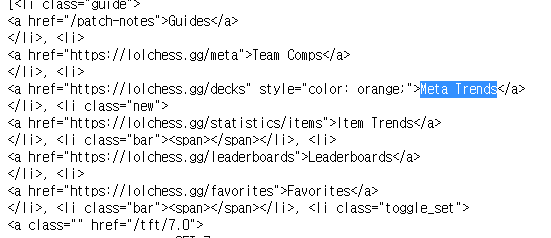

- html이 영어버전으로 되어있어서 ```"천상계 덱"```부분이 ```"Meta Trends"```로 되어있었다.
- 위 코드에서 출력할 때 인덱스도 함께 보이도록 출력하였다.
- 우리가 원하는 부분의 위치는 인덱스 2 이다.
- 이제는 하이퍼링크 부분을 찾아보자

In [25]:
href = container[2].find_all("a")
for j in range(len(href)):
    print(j, href[j])

0 <a href="/patch-notes">Guides</a>
1 <a href="https://lolchess.gg/meta">Team Comps</a>
2 <a href="https://lolchess.gg/decks" style="color: orange;">Meta Trends</a>
3 <a href="https://lolchess.gg/statistics/items">Item Trends</a>
4 <a href="https://lolchess.gg/leaderboards">Leaderboards</a>
5 <a href="https://lolchess.gg/favorites">Favorites</a>
6 <a class="" href="/tft/7.0">
                        SET 7
                    </a>
7 <a href="https://lolchess.gg/guide/augments">Augments</a>
8 <a href="https://lolchess.gg/champions/set7">Champions</a>
9 <a href="https://lolchess.gg/synergies/set7">Traits</a>
10 <a href="https://lolchess.gg/items/set7">Items</a>
11 <a href="https://lolchess.gg/cheatsheet/set7">Cheat Sheet</a>
12 <a href="https://lolchess.gg/builder/set7">Builder</a>
13 <a href="/simulator">Synergy Builder</a>


- 인덱스 번호 2번에서 ```Meta Trends"```를 찾을 수 있었다.
- ```href```정보만 추출하려면 ```.attrs['href']```메소드를 사용하면 된다.

In [26]:
print(href[2].attrs['href'])

https://lolchess.gg/decks


- 해당링크로 들어가보면 천상계 덱을 추천해주는 페이지로 잘 연결이 된다.
- ```href```말고도 ```style, src, title```등 원하는 부분을 ```.attrs['원하는 부분']```메소드에 넣어서 찾을 수 있다!